__Exploratory Data Analysis__

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
rw = pd.read_csv("winequality-red.csv")

In [5]:
rw.shape

(1599, 12)

In [9]:
rw.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


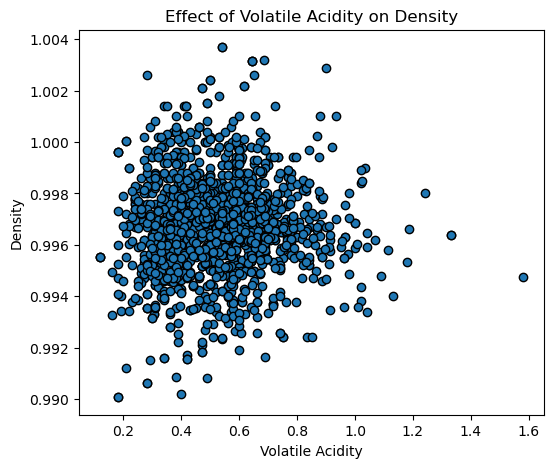

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(rw["volatile_acidity"],rw["density"],edgecolor="black")
plt.title("Effect of Volatile Acidity on Density")
plt.suptitle("")
plt.xlabel("Volatile Acidity")
plt.ylabel("Density")
plt.show()

The scatterplot points have no pattern. They are all concentrated around the area of volatile acidity range of (0.2 to 1) and acidity range of (0.992 to 1.002). So, there is no observable effect of volatile acidity of the red wines on their density.

The we create a new qualitative variable, called QLevel, by binning the quality variable into two categories (High and Medium). Specifically, we divide the data into two groups based on whether the quality level exceeds 6 or not (quality greater than 6 is considered High otherwise it is considered Medium). Then we produce side-by-side boxplots of the ratio of sulphates to chlorides for each of the two QLevel categories.

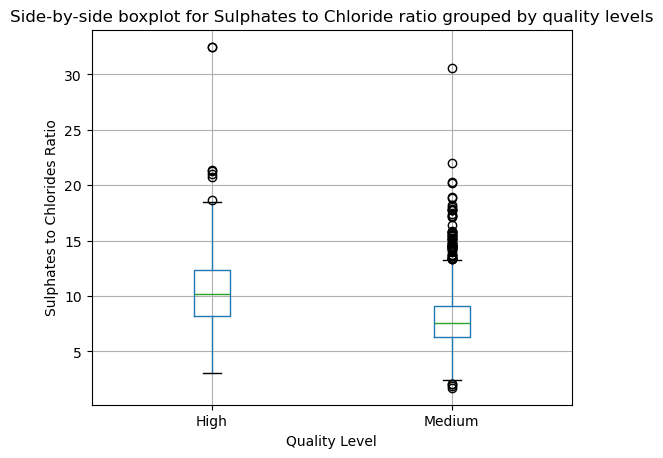

In [11]:
rw["Qlevel"] = rw["quality"].apply(
    lambda x: "High" if x>6 else "Medium"
)
rw["sulph_to_chlor"] = rw["sulphates"]/rw["chlorides"]

rw.boxplot(column="sulph_to_chlor", by="Qlevel", figsize=(6,5))
plt.title("Side-by-side boxplot for Sulphates to Chloride ratio grouped by quality levels")
plt.suptitle("")
plt.xlabel("Quality Level")
plt.ylabel("Sulphates to Chlorides Ratio")
plt.show()

In [13]:
counts=rw["Qlevel"].value_counts()
print(counts)

Qlevel
Medium    1382
High       217
Name: count, dtype: int64


Then we produce a histogram showing the citric_acid numbers for both High and Medium (QLevel) wine samples. We produce one plot for High samples and one for Medium samples.

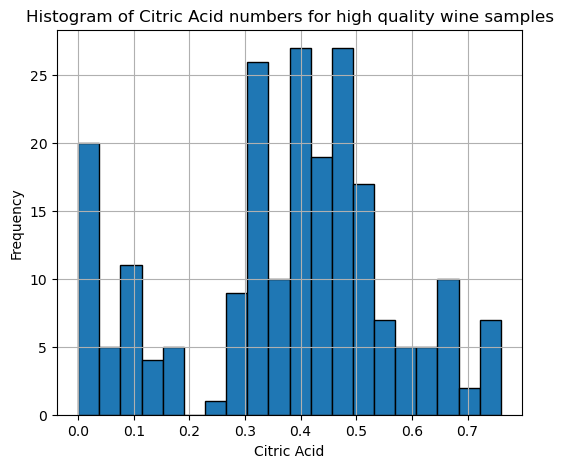

In [14]:
rw[rw["Qlevel"]=="High"]["citric_acid"].hist(bins=20,
                                             edgecolor="black",
                                             figsize=(6,5))
plt.title("Histogram of Citric Acid numbers for high quality wine samples")
plt.suptitle("")
plt.xlabel("Citric Acid")
plt.ylabel("Frequency")
plt.show()

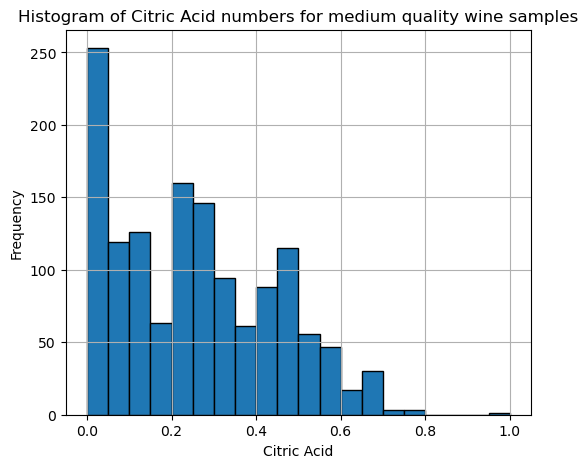

In [15]:
rw[rw["Qlevel"]=="Medium"]["citric_acid"].hist(bins=20,
                                               edgecolor="black",
                                               figsize=(6,5))
plt.title("Histogram of Citric Acid numbers for medium quality wine samples")
plt.suptitle("")
plt.xlabel("Citric Acid")
plt.ylabel("Frequency")
plt.show()

We hypothesize that the volatile acidity decreases in the wine quality. The below line chart supports the hypothesis and depicts that the mean volatile acidity grouped by different wine quality levels (3, 4, … ) gradually decreases as the wine quality increases.

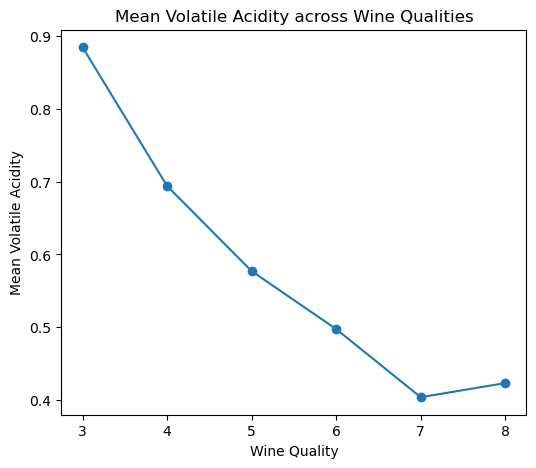

In [16]:
mean_volatile_acidity = rw.groupby("quality")["volatile_acidity"].mean()
mean_volatile_acidity.plot.line(marker="o", figsize=(6,5))
plt.title("Mean Volatile Acidity across Wine Qualities")
plt.suptitle("")
plt.xlabel("Wine Quality")
plt.ylabel("Mean Volatile Acidity")
plt.show()

Our next hypothesis is that residual sugar is likely to have positive correlation with total sulfur dioxide. However, the scatter plot rejects the hypothesis and suggests that most wines have low resiudal sugar and low sulfur dioxide with a higher range but there is no observable positive or negative correlation between these two variables.

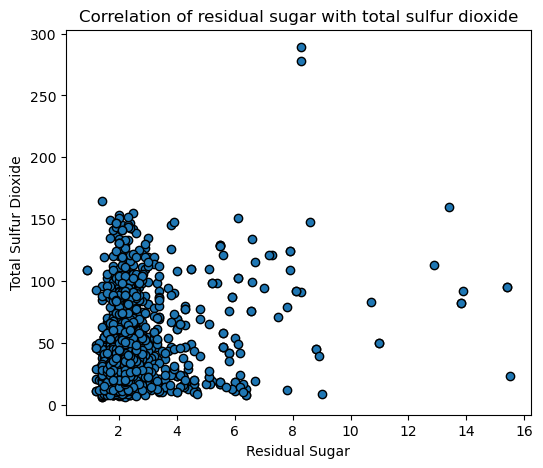

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(rw["residual_sugar"],
rw["total_sulfur_dioxide"],
edgecolor="black")
plt.title("Correlation of residual sugar with total sulfur dioxide")
plt.suptitle("")
plt.xlabel("Residual Sugar")
plt.ylabel("Total Sulfur Dioxide")
plt.show()

__Regression Analyses__

In [30]:
rw.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
            'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
            'pH','sulphates','alcohol','quality']

In [34]:
X = MS(rw.columns.drop(['citric_acid','pH'])).fit_transform(rw)
multimodel = sm.OLS(rw.pH,X).fit()
summarize(multimodel)

,coef,std err,t,P>|t|
intercept,-60.5670,2.321000,-26.094,0.000
fixed_acidity,-0.0986,0.002000,-48.506,0.000
volatile_acidity,0.0214,0.014000,1.555,0.120
residual_sugar,-0.0258,0.002000,-13.912,0.000
chlorides,-0.5385,0.052000,-10.436,0.000
free_sulfur_dioxide,0.0017,0.000000,5.954,0.000
total_sulfur_dioxide,-0.0008,0.000091,-8.785,0.000
density,64.3451,2.326000,27.663,0.000
sulphates,-0.0708,0.015000,-4.675,0.000
alcohol,0.0729,0.003000,24.066,0.000


(i) All the predictors except volatile_acidity appear to have a statistically significant relationship to the response variable. In linear regression, each coefficient is tested with a t-test of null hypothesis, $H_0: \beta_j = 0$ with a significance level, $\alpha = 0.05$ ($95\%$ confidence level). If the p-value is $< 0.05$, we reject this null hypothesis and conclude that the predictor has a statistically significant association with the response variable. In our case, p-values of all predictors are less than $0.05$ except volatile_acidity which has a p-value of $0.120 > 0.05$. Thus, all the predictors except volatile_acidity appear to have a statistically significant relationship to the response.

(ii) In simple terms, the coefficient for the free_sulfur_dioxide variable suggests that for each unit increase in free_sulfur_dioxide, the model predicts a $0.0017$ unit increase in the level of pH, holding all other predictors fixed. 

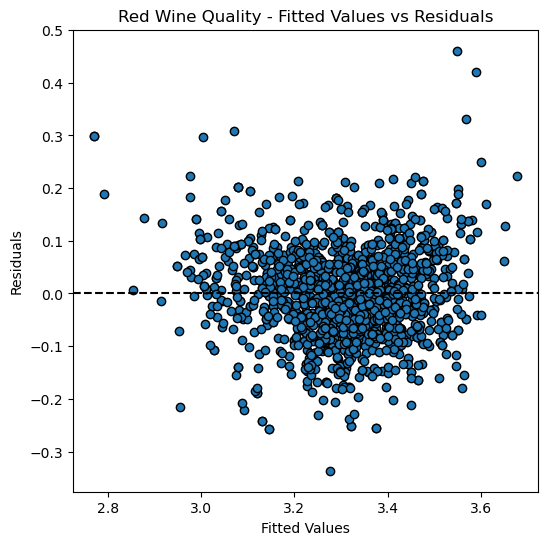

In [69]:
rwplot = subplots(figsize=(6,6))[1]
rwplot.scatter(multimodel.fittedvalues, multimodel.resid,edgecolor="black")
rwplot.set_title('Red Wine Quality - Fitted Values vs Residuals')
rwplot.set_xlabel('Fitted Values')
rwplot.set_ylabel('Residuals')
rwplot.axhline(0,c='k',ls='--')

Overall the plot looks good in terms of linear regression assumptions. One potential problem I see with the fit is a mild funnel shape from left to right suggesting a possible unequal variance or heteroskedasticity. However, the pattern is very mild in my opinion. Several points are far from zero in y-axis indicating a possibility of them being outliers, especially for larger fitted values. But a leverage plot will give us a clearer picture of the overall outliers. 

151

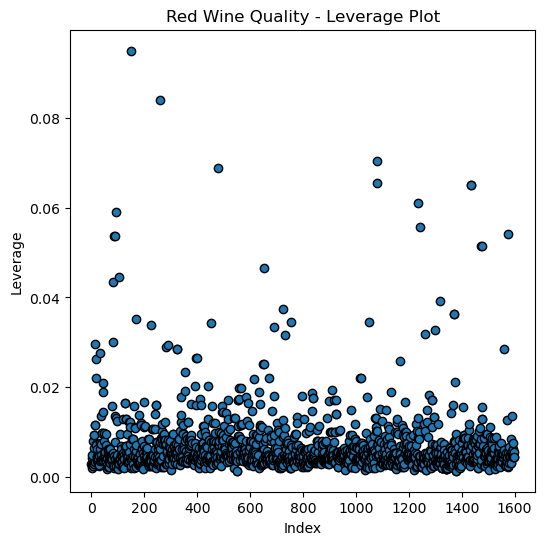

In [52]:
infl = multimodel.get_influence()
rwplot2 = subplots(figsize = (6,6))[1]
rwplot2.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, edgecolor = "black")
rwplot2.set_title('Red Wine Quality - Leverage Plot')
rwplot2.set_xlabel('Index')
rwplot2.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

From the leverage plot, we observe several points with unusually high leverage. For instance, two observations are beyond $0.08$ in leverage and might be considered as having high leverage. $5$ observations are between $0.06$ and $0.08$ in leverage. They can also be considered as high-leverage observations. The outlier with the maximum leverage is the $151^{st}$ observation. 

In [55]:
X = MS(['fixed_acidity','volatile_acidity',
        ('fixed_acidity','volatile_acidity')]).fit_transform(rw)
interaction1 = sm.OLS(rw.alcohol, X).fit()
summarize(interaction1)

,coef,std err,t,P>|t|
intercept,10.9439,0.413,26.479,0.000
fixed_acidity,0.0253,0.048,0.529,0.597
volatile_acidity,0.2954,0.780,0.379,0.705
fixed_acidity:volatile_acidity,-0.2057,0.093,-2.202,0.028


The interaction between fixed_acidity and volatile_acidity is NOT statistically significant (p-value $= 0.028 > 0.05$)  when predicting alcohol.

In [56]:
X = MS(['citric_acid','residual_sugar',
        ('citric_acid','residual_sugar')]).fit_transform(rw)
interaction2 = sm.OLS(rw.alcohol,X).fit() 
summarize(interaction2)

,coef,std err,t,P>|t|
intercept,10.5427,0.104,101.624,0.000
citric_acid,-0.4165,0.287,-1.452,0.147
residual_sugar,-0.1129,0.039,-2.923,0.004
citric_acid:residual_sugar,0.3849,0.097,3.954,0.000


The interaction between citric_acid and residual_sugar is statistically significant (p-value $= 0.000 << 0.05$) when predicting alcohol.

In [59]:
X = MS(['chlorides','total_sulfur_dioxide',
        ('chlorides','total_sulfur_dioxide')]).fit_transform(rw)
interaction3 = sm.OLS(rw.alcohol, X).fit()
summarize(interaction3)

,coef,std err,t,P>|t|
intercept,10.8354,0.110,98.070,0.000
chlorides,-1.2096,1.205,-1.004,0.316
total_sulfur_dioxide,-0.0003,0.002,-0.167,0.868
chlorides:total_sulfur_dioxide,-0.0704,0.021,-3.332,0.001


The interaction between chlorides and total_sulfur_dioxide is statistically significant (p-value $= 0.001 << 0.05$) when predicting alcohol.